# Title of Project
Movie Recommendation System

# Objective
To build a machine learning-based movie recommendation system that predicts and suggests movies to users based on their preferences and movie metadata.


# Data source
Utilize publicly available datasets such as:
- The provided `Movies Recommendation.csv` dataset.

# import Library

In [31]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt


# import Data

In [34]:
movies_data=pd.read_csv("C:\\Users\\parag\\Downloads\\Movies Recommendation.csv")

In [35]:
movies_data

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4755,4784,Midnight Cabaret,Horror,en,0,0.001389,01-01-1990,0,94.0,0.0,...,NaN,NaN,A Broadway producer puts on a play with a Devi...,[],[],"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The hot spot where Satan's waitin'.,Lisa Hart Carroll Michael Des Barres Paul Drak...,"[{'name': 'Pece Dingo', 'gender': 0, 'departme...",Pece Dingo
4756,4785,Growing Up Smith,Comedy Family Drama,en,0,0.710870,03-02-2017,0,102.0,7.4,...,http://www.growingupsmithmovie.com,NaN,"In 1979, an Indian family moves to America wit...",[],[],"[{""iso_639_1"": ""en"", ""name"": ""English""}]",It’s better to stand out than to fit in.,Roni Akurati Brighton Sharbino Jason Lee Anjul...,"[{'name': 'Frank Lotito', 'gender': 0, 'depart...",Frank Lotito
4757,4786,8 Days,Thriller Drama,en,0,0.015295,15-06-2014,0,90.0,0.0,...,NaN,christian film sex trafficking,"After sneaking to a party with her friends, 16...","[{""name"": "

# Describe Data

In [39]:
movies_data.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [41]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

# Data Visualization

C:\Users\parag\AppData\Local\Temp\ipykernel_23540\3288140407.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette="viridis")


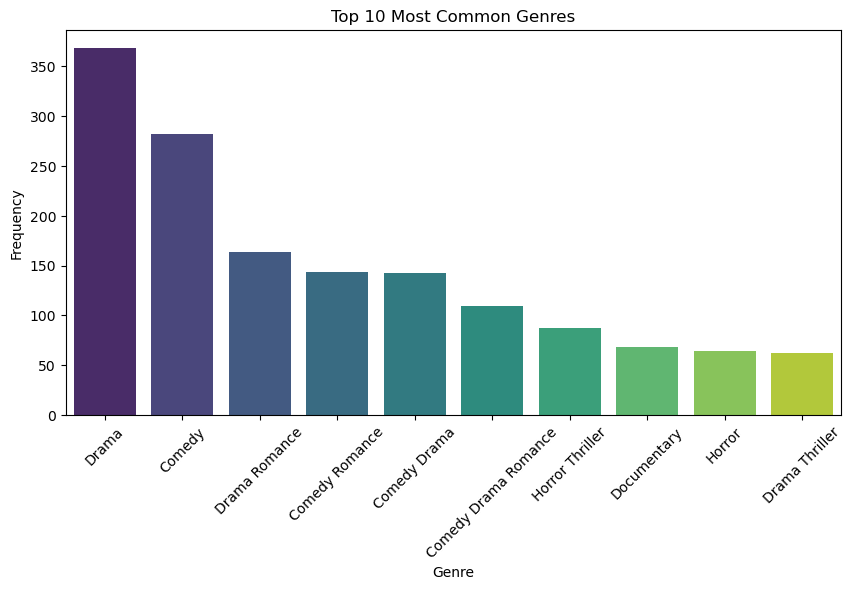

In [44]:
top_genres = (
    movies_data["Movie_Genre"]
    .str.split(", ")
    .explode()
    .value_counts()
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_genres.index, y=top_genres.values, palette="viridis")
plt.title("Top 10 Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Data Preprocessing

In [47]:
movies_data['Movie_Genre'] = movies_data['Movie_Genre'].fillna('')
movies_data['Movie_Keywords'] = movies_data['Movie_Keywords'].fillna('')
movies_data['Movie_Overview'] = movies_data['Movie_Overview'].fillna('')

# Combine features for text vectorization
movies_data['Combined_Features'] = (
    movies_data['Movie_Genre'] + ' ' +
    movies_data['Movie_Keywords'] + ' ' +
    movies_data['Movie_Overview']
)

print("\nSample Combined Features:")
print(movies_data['Combined_Features'].head())



Sample Combined Features:
0    Crime Comedy hotel new year's eve witch bet ho...
1    Adventure Action Science Fiction android galax...
2    Animation Family father son relationship harbo...
3    Comedy Drama Romance vietnam veteran hippie me...
4    Drama male nudity female nudity adultery midli...
Name: Combined_Features, dtype: object


# Define Target Variable (y) and Feature Variables (X)
No explicit target variable; the recommendation system is based on similarity.


# Train Test Split
Not applicable as this is a similarity-based system.


# Modeling

In [56]:
vectorizer = CountVectorizer(stop_words='english')
feature_matrix = vectorizer.fit_transform(movies_data['Combined_Features'])

print("\nFeature Matrix Shape:", feature_matrix.shape)
cosine_sim = cosine_similarity(feature_matrix, feature_matrix)



Feature Matrix Shape: (4760, 21686)


# Model Evaluation
Not applicable as this is a similarity-based system.


# Prediction

In [64]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = movies_data[movies_data['Movie_Title'] == title].index[0]
    
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    
    sim_scores = sim_scores[1:11]  
    movie_indices = [i[0] for i in sim_scores]
    
    
    return movies_data['Movie_Title'].iloc[movie_indices]


movie_title = "8 Days" 
recommendations = get_recommendations(movie_title)

print(f"\nMovies similar to '{movie_title}':")
for idx, movie in enumerate(recommendations, 1):
    print(f"{idx}. {movie}")


Movies similar to '8 Days':
1. Partition
2. Thirteen
3. Kids
4. Skin Trade
5. Horror
6. Fish Tank
7. Just Looking
8. Hard Candy
9. Y tu mamá también
10. Don Jon


# Explanation
This system uses cosine similarity on vectorized text features (genres, keywords, overview)
to find and recommend movies similar to the one provided.